# Analysis of Players' Overall Rating in 2016 - [Database_soccer]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> Working with a database of European Soccer collected over a period of 9 years (2007 - 2016), the data will be analysed to find out how **players attributes affect the overall and potential ratings of the players for the year 2016**. To achieve this, I have asked 6 questions that examines how the independent variables interact with each other and with the dependent variable. 

### Dataset Description 
>The database contains several tables like the countries involved, the football leagues the countries participated in, the players, their teams, etc. 
>
>To analyse the data based on the posed questions, we will be focused on two tables which are the Player.csv and Player_Attributes.csv. These tables are related through columns with the **api_id** suffix which is a foreign key in all tables of the database
>
>The Player.csv contains details of the players such as id, player_api_id, name of the player, fifa_api_id, date of birth, height and weight
>
>The Players' attributes are stored in the Player_Attribute.csv. This is where we have the overall and potential ratings for the players. The overall rating is the actual rating of the player based on the attributes while the potential rating is the least expected rating for the player. Note that there are multiple ratings for the same player depending on the date the assessment is carried out.
>
>Another important column in the Player_Attribute.csv that we would be working with include the preferred foot of the player. According to the [dataset description](https://sofifa.com/players), the soccer attributes of the players (crossing finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots,aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes) can be summarised into 5 major groups: Attacking, Skill, Mentality, Movement, Power, Defending, GoalKeeping. These groups will be defined later on. Additionally, we will have to create new columns to answer our questions.


### Question(s) for Analysis
> Firstly, we get to understand if playing with the left or right increases the player's shots and by extension, the overall rating of the player. Secondly, we will consider the age of the player to determine if younger or older players have a high rating. Then we will check the attributes of the players such as agility, sprint speed, ball_control etc. and how each of them affects the rating score. At this point, we will check The BMI of each player since it is considered that the weight of a person plays an important role in their well-being. Moving away from the players' attributes, we will understand the general trend for potential and overall ratings for the players from the beginning of 2016. Here, we will also identify how well players meet up to their potential. Finally, we will extract the data of the top 10 players for the year and see how their attributes fit into the insights we have gathered from above.  
>
> Hence, the following questions are posed:
>
> 1. What is the effect of prefferred foot on long shots?
>
> 2. What relationship exists between age of the football players and the overall rating? 
>
> 3. Find the mean overall rating. Make a comparison of players with attributes above the mean and players below the mean.
>
> 4. Is there a relationship between the players' BMI and overall_rating? 
>
> 5. Compare the trend for players general overall rating and potential in 2016. 
>
> 6. Who are the top 10 players for the year 2016

In [1]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>The first dataset we will be working on is the Player.csv. This is where the personal details of the players are stored. Firstly, we will get familiar with the data by checking for nulls, duplicates. Then we will create the BMI metric which is a variable that is needed to answer one of our research questions. Also, all unnecessary colums will be dropped. 

In [3]:
#load the first data
df_player = pd.read_csv('Database_Soccer/Player.csv')
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
#understand the data
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


>The birthday column is of the wrong data type. This will be corrected in the next section.
>
>We can already see that there are no nulls so we check for duplicates.

In [5]:
#check for duplicate values
df_player.duplicated().sum()

0

>Based on the questions to be answered, we would need the BMI of the players. Later, we would talk about why the BMI is important. We can already calculate the BMI column from the above data. The [BMI](https://www.medicalnewstoday.com/articles/323622#Understanding-the-results) is gotten by dividing the weight of a person (in kilograms) by the square of their height (in meters).

In [6]:
#convert the height in cm to m
df_player['height'] = df_player['height'] * 0.01

In [7]:
#convert the weight in pounds to kg
df_player['weight'] = df_player['weight'] * 0.453592

In [8]:
#find the bmi and insert into the dataset
df_player['bmi'] = (df_player['weight'] / (df_player['height'])**2).round(2)
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,bmi
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,1.8288,84.821704,25.36
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,1.7018,66.224432,22.87
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,1.7018,73.935496,25.53
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,1.8288,89.811216,26.85
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,1.8288,69.853168,20.89


>Now we can drop the height and weight columns. We will still keep the api_id because it a foriegn key that will be needed to join the second table. Since there are two api_id columns, we will drop one of them to avoid redundancy.

In [9]:
#drop the redundant columns
df_player.drop(['height', 'weight', 'player_fifa_api_id' ], axis=1, inplace=True)

In [10]:
#summarise the data
df_player.describe()

,id,player_api_id,bmi
count,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,23.066061
std,3197.692647,160713.700624,1.317090
min,1.000000,2625.000000,17.590000
25%,2767.750000,35555.500000,22.170000
50%,5536.500000,96619.500000,23.060000
75%,8306.250000,212470.500000,23.870000
max,11075.000000,750584.000000,30.870000


In [11]:
#summarise the data
df_player.describe(include='object')

,player_name,birthday
count,11060,11060
unique,10848,5762
top,Danilo,1989-03-02 00:00:00
freq,7,10


> We are now finished with the first dataset. We have prepared it to answer our questions but it is not sufficient. Therefore, > we proceed to the next dataset and perform some data cleaning.
>
> Firstly, since we are interested in attributes collected in 2016, we will change the date datatype from object to datetime then drop the rows that do not fulfill this requirement. After this, we will continue with assessing the data.

In [12]:
#load the second dataset
df_attrib= pd.read_csv('Database_Soccer/Player_Attributes.csv')
df_attrib.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
#convert the date to datetime
df_attrib['date']= pd.to_datetime(df_attrib['date'])

In [14]:
#drop the entries that were recorded before 2016
df_attrib.drop(df_attrib.query('date < "2016-01-01"').index, axis=0, inplace=True)

In [15]:
#confirm the earliest and latest date in the dataset
df_attrib['date'].min(), df_attrib['date'].max()

(Timestamp('2016-01-07 00:00:00'), Timestamp('2016-07-07 00:00:00'))

In [16]:
#understand the data
df_attrib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14103 entries, 0 to 183904
Data columns (total 42 columns):
id                     14103 non-null int64
player_fifa_api_id     14103 non-null int64
player_api_id          14103 non-null int64
date                   14103 non-null datetime64[ns]
overall_rating         14098 non-null float64
potential              14098 non-null float64
preferred_foot         14098 non-null object
attacking_work_rate    14098 non-null object
defensive_work_rate    14098 non-null object
crossing               14098 non-null float64
finishing              14098 non-null float64
heading_accuracy       14098 non-null float64
short_passing          14098 non-null float64
volleys                14098 non-null float64
dribbling              14098 non-null float64
curve                  14098 non-null float64
free_kick_accuracy     14098 non-null float64
long_passing           14098 non-null float64
ball_control           14098 non-null float64
acceleration      

>As we can see, there are a lot of columns. Earlier in our analysis, we stated that the players attributes can be summarised into groups. Here are the groups and how the attributes are summarised:
>
>**Attacking:** 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys'
>
>**Skill:** 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control'
>
>**Movement:** 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance'
>
>**Power:** 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
>
>**Mentality:**  'aggression', 'interceptions', 'positioning', 'vision', 'penalties'
>
>**Defending:** 'marking', 'standing_tackle', 'sliding_tackle'
>
>**GoalKeeping:** gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
>
>The analysis will be based on these groups. We will find the average of the attributes in a group then use this as the value for that group. For example, in the first observation, the value of attacking is calculated by finding the average of crossing, finishing, heading_accuracy, short_passing and volleys. The same method applies to the other groups. Each row has all 7 groups.

In [17]:
#create new columns and group the attributes
df_attrib['attack'] = df_attrib.iloc[:, 9:14].mean(axis=1)
df_attrib['skill'] = df_attrib.iloc[:, 14:19].mean(axis=1)
df_attrib['movement'] = df_attrib.iloc[:, 19:24].mean(axis=1)
df_attrib['power'] = df_attrib.iloc[:, 24:29].mean(axis=1)
df_attrib['mentality'] = df_attrib.iloc[:, 29:34].mean(axis=1)
df_attrib['defend'] = df_attrib.iloc[:, 34:37].mean(axis=1).round(1)
df_attrib['goal_keep'] = df_attrib.iloc[:, 37:42].mean(axis=1)
df_attrib.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,attack,skill,movement,power,mentality,defend,goal_keep
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,53.8,49.6,59.0,55.6,57.6,67.7,8.6


>Now we drop all the columns we have aggregated except the long shots because we have to analyse how preffered foot has an effect on long shots. 
Firstly, we drop the columns before long shots, then the columns after long shots. At this point, we will also drop one of the foreign keys

In [18]:
#drop the columns before long shots
df_attrib.drop(df_attrib.columns[7:28], axis=1, inplace = True)

In [19]:
#drop the columns after long shots
df_attrib.drop(df_attrib.columns[8:21], axis=1, inplace = True)

In [20]:
#drop one of the foreign keys and view the aggregated dataset
df_attrib.drop(['player_fifa_api_id' ], axis=1, inplace=True)
df_attrib.head(1)

,id,player_api_id,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
0,1,505942,2016-02-18,67.0,71.0,right,35.0,53.8,49.6,59.0,55.6,57.6,67.7,8.6


> Now that we have trimmed the data, we may check for nulls and duplicates.

In [21]:
#check for the null values
df_attrib.isnull().sum()

id                0
player_api_id     0
date              0
overall_rating    5
potential         5
preferred_foot    5
long_shots        5
attack            5
skill             5
movement          5
power             5
mentality         5
defend            5
goal_keep         5
dtype: int64

In [22]:
#check for duplicate values.
df_attrib.duplicated().sum()

0

>There are no duplicate values but there are null values. In the next section, we will deal with the null values.

### Data Cleaning

> We already established that there are neither null nor duplicated values in the first dataset of the players. But, that the birthday column is of the wrong data type.
>
>In the second dataset, we saw that there are no duplicates but there are nulls. Because the dataset is large and the highest number of null values we have in a single column is 5, (which is insignificant relative to the size of the dataset) we will drop the rows with null values. 

>In this section, we will reslove the two problems. We will start with the first dataset then the second.

In [23]:
#convert the birthday in the players dataset to datetime and view the data
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 5 columns):
id               11060 non-null int64
player_api_id    11060 non-null int64
player_name      11060 non-null object
birthday         11060 non-null datetime64[ns]
bmi              11060 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 432.1+ KB


> We are done with the cleaning for the first dataset, now, we move to the second dataset which has nulls. After getting rid of the nulls, we will try to understand the data.

In [24]:
#drop the null values in the players attributes dataset.
df_attrib.dropna(inplace=True)
df_attrib.isnull().sum().any()

False

In [25]:
#summarise the players attributes data
df_attrib.describe()

,id,player_api_id,overall_rating,potential,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
count,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000
mean,92232.051426,207036.534969,70.382466,73.812030,56.334445,57.063711,59.072776,67.734317,64.996567,57.400000,49.378274,13.927763
std,53010.864588,179114.165933,6.083105,5.969038,18.172715,13.225364,14.437662,9.902612,9.423791,11.149577,22.013395,13.808508
min,1.000000,2768.000000,47.000000,54.000000,6.000000,10.000000,10.600000,26.800000,27.600000,14.200000,6.000000,1.000000
25%,46318.000000,42691.250000,66.000000,70.000000,46.000000,51.800000,52.400000,62.200000,60.400000,52.600000,27.700000,9.800000
50%,93777.500000,167465.000000,71.000000,74.000000,61.000000,59.600000,61.800000,69.000000,66.600000,59.000000,55.700000,10.800000
75%,137403.750000,292313.000000,75.000000,78.000000,69.000000,65.600000,68.800000,74.800000,71.600000,64.600000,69.000000,12.000000
max,183905.000000,750584.000000,90.000000,94.000000,91.000000,83.200000,89.000000,90.600000,89.800000,84.200000,90.000000,88.000000


In [26]:
#summarise the data to include date and preferred_foot
df_attrib.describe(include=('object', 'datetime'))

,date,preferred_foot
count,14098,14098
unique,29,2
top,2016-03-10 00:00:00,right
freq,1180,10560
first,2016-01-07 00:00:00,NaN
last,2016-07-07 00:00:00,NaN


> The two datasets are now good to work with. We will merge the two datasets using a left join with player_api_id as the common column. We are using a left join because we want to gather the attributes for all the players in the Players dataset.

In [27]:
#perform the merging
df_rate = df_player.merge(df_attrib, on='player_api_id', how='left')
df_rate.head()

,id_x,player_api_id,player_name,birthday,bmi,id_y,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
0,1,505942,Aaron Appindangoye,1992-02-29,25.36,1.0,2016-02-18,67.0,71.0,right,35.0,53.8,49.6,59.0,55.6,57.6,67.7,8.6
1,2,155782,Aaron Cresswell,1989-12-15,22.87,6.0,2016-04-21,74.0,76.0,left,62.0,60.4,70.2,78.4,70.6,64.0,76.3,10.2
2,2,155782,Aaron Cresswell,1989-12-15,22.87,7.0,2016-04-07,74.0,76.0,left,60.0,58.8,70.2,78.4,70.2,64.0,76.3,10.2
3,2,155782,Aaron Cresswell,1989-12-15,22.87,8.0,2016-01-07,73.0,75.0,left,59.0,57.4,69.2,78.4,69.8,63.0,76.3,10.2
4,3,162549,Aaron Doran,1991-05-13,25.53,39.0,2016-01-07,65.0,67.0,right,57.0,60.0,65.0,75.8,64.0,61.6,23.0,12.2


In [28]:
#understand the merged data
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19572 entries, 0 to 19571
Data columns (total 18 columns):
id_x              19572 non-null int64
player_api_id     19572 non-null int64
player_name       19572 non-null object
birthday          19572 non-null datetime64[ns]
bmi               19572 non-null float64
id_y              14098 non-null float64
date              14098 non-null datetime64[ns]
overall_rating    14098 non-null float64
potential         14098 non-null float64
preferred_foot    14098 non-null object
long_shots        14098 non-null float64
attack            14098 non-null float64
skill             14098 non-null float64
movement          14098 non-null float64
power             14098 non-null float64
mentality         14098 non-null float64
defend            14098 non-null float64
goal_keep         14098 non-null float64
dtypes: datetime64[ns](2), float64(12), int64(2), object(2)
memory usage: 2.8+ MB


> Note that there are multiple entries for the same player with different rating dates. We will keep the most recent rating date (which is always the first entry) and delete the others.
>
> We will also check for nulls in case there are players whose attributes were not recorded.

In [29]:
#drop the players with multiple ratings and keep the recent
df_rate.drop_duplicates('player_name', keep='first', inplace=True )

In [30]:
#confirm that each player has a single entry
df_rate['player_name'].value_counts().any() > 1

False

In [31]:
#check for nulls
df_rate.isnull().sum()

id_x                 0
player_api_id        0
player_name          0
birthday             0
bmi                  0
id_y              5345
date              5345
overall_rating    5345
potential         5345
preferred_foot    5345
long_shots        5345
attack            5345
skill             5345
movement          5345
power             5345
mentality         5345
defend            5345
goal_keep         5345
dtype: int64

In [32]:
#check for duplicates
df_rate.duplicated().sum()

0

> Apparently, there are many players whose attributes were not recorded for 2016. It is half of the dataset so, filling these nulls with the mean value will significantly skew our result. A better approach would be to search for this data however, we will drop the null rows. We will also drop the columns that we no longer need. 

In [33]:
#drop the redundant columns
df_rate.drop(['id_x', 'player_api_id', 'id_y'], axis=1, inplace= True)

In [34]:
#drop the rows with null values and view the data
df_rate.dropna(inplace=True)
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 0 to 19565
Data columns (total 15 columns):
player_name       5503 non-null object
birthday          5503 non-null datetime64[ns]
bmi               5503 non-null float64
date              5503 non-null datetime64[ns]
overall_rating    5503 non-null float64
potential         5503 non-null float64
preferred_foot    5503 non-null object
long_shots        5503 non-null float64
attack            5503 non-null float64
skill             5503 non-null float64
movement          5503 non-null float64
power             5503 non-null float64
mentality         5503 non-null float64
defend            5503 non-null float64
goal_keep         5503 non-null float64
dtypes: datetime64[ns](2), float64(11), object(2)
memory usage: 687.9+ KB


>This brings us to the end of the wrangling phase. Now that we have a new dataset to work with, we will save it as a csv then continue subsequent analysis with it.

In [48]:
df_rate.to_csv('soccer_players_2016.csv', index=False)

In [35]:
df_rate= pd.read_csv('soccer_players_2016.csv')
df_rate.head()

,player_name,birthday,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
0,Aaron Appindangoye,1992-02-29,25.36,2016-02-18,67.0,71.0,right,35.0,53.8,49.6,59.0,55.6,57.6,67.7,8.6
1,Aaron Cresswell,1989-12-15,22.87,2016-04-21,74.0,76.0,left,62.0,60.4,70.2,78.4,70.6,64.0,76.3,10.2
2,Aaron Doran,1991-05-13,25.53,2016-01-07,65.0,67.0,right,57.0,60.0,65.0,75.8,64.0,61.6,23.0,12.2
3,Aaron Galindo,1982-05-08,26.85,2016-04-21,69.0,69.0,right,29.0,51.8,51.4,45.4,59.6,49.8,70.3,12.6
4,Aaron Hunt,1986-09-04,21.84,2016-04-28,77.0,77.0,left,76.0,73.8,76.0,74.4,71.4,69.6,32.3,13.0


In [36]:
#ensure that the data is same as what we converted to csv
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5503 entries, 0 to 5502
Data columns (total 15 columns):
player_name       5503 non-null object
birthday          5503 non-null object
bmi               5503 non-null float64
date              5503 non-null object
overall_rating    5503 non-null float64
potential         5503 non-null float64
preferred_foot    5503 non-null object
long_shots        5503 non-null float64
attack            5503 non-null float64
skill             5503 non-null float64
movement          5503 non-null float64
power             5503 non-null float64
mentality         5503 non-null float64
defend            5503 non-null float64
goal_keep         5503 non-null float64
dtypes: float64(11), object(4)
memory usage: 645.0+ KB


In [37]:
#convert birthday and date to datetime
df_rate['birthday']=pd.to_datetime(df_rate['birthday'])
df_rate['date']=pd.to_datetime(df_rate['date'])

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What is the effect of prefferred foot on long shots? 

> The aim of this question is to find out if using either the left or right foot increases the score for long_shots.
>
>Firstly, we will check how many players use their left or right foot. Then we will check the mean of long_shots based on foot type. 
>
>Finally, we will see if a relationship exists between foot type and overall rating.

>Let us check how many palyers use their left or right foot

,preferred_foot
right,4131
left,1372


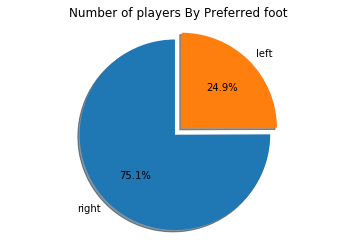

In [38]:
# pie chart of number of players based on foot type
labels = 'right', 'left'
sizes = df_rate['preferred_foot'].value_counts()
explode = (0, 0.1)

fig, ax = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Number of players by Preferred foot')

pd.DataFrame(df_rate['preferred_foot'].value_counts())

In [39]:
# average long_shots for each foot
foot_shots = df_rate.groupby('preferred_foot')['long_shots'].mean()
foot_shots

preferred_foot
left     56.185131
right    53.535464
Name: long_shots, dtype: float64

>It appears that players who prefer to use their left foot have a mean higher score for long shots than those who use their right foot even though there are generally more players who use their right foot. 
>
>We may check how preferred foot has an effet on the overall rating of the players. Since left-foot players tend to have longer_shots, does this attribute improve their overall rating?

In [40]:
# preferred foot by mean overall rating
df_rate.groupby('preferred_foot')['overall_rating'].mean()

preferred_foot
left     70.044461
right    69.985476
Name: overall_rating, dtype: float64

> There is no significant difference between the overall rating for players who prefer to play with their left or right foot. This is most likely because long shots is not an independent variable for overall rating. It is an attribute of Power.

,long_shots
preferred_foot,
left,56.185131
right,53.535464


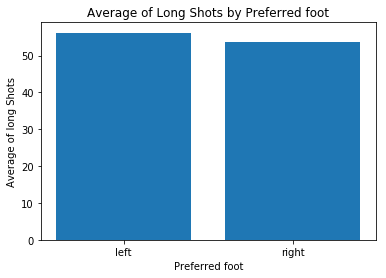

In [41]:
# visualization of long shots by preferred foot.
plt.bar(['left','right'], foot_shots)
plt.title('Average of Long Shots by Preferred foot')
plt.xlabel('Preferred foot')
plt.ylabel('Average of long Shots')

pd.DataFrame(foot_shots)

### 2. What relationship exists between the age of the football players and the overall rating?

>Firstly, we will have to calculate the age from the birthday and date columns. We are using the age when the rating was carried out. 
>
>To do this, we will subtract the days between the birthday and the date the rating was recorded. This prevents us from rounding up the days before their birthday. Then this number will be divided by 365.
>
>We will replace the birthday column with the age since we no longer need the birthday column.

In [42]:
# subtracting the days between birthday and date
age = ((df_rate['date'] - df_rate['birthday']) / 365)

In [43]:
# convert age to integer and replace the birthday column
df_rate['birthday'] = age.dt.days
df_rate = df_rate.rename(columns= {'birthday' : 'age'})
df_rate.head()

,player_name,age,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
0,Aaron Appindangoye,23,25.36,2016-02-18,67.0,71.0,right,35.0,53.8,49.6,59.0,55.6,57.6,67.7,8.6
1,Aaron Cresswell,26,22.87,2016-04-21,74.0,76.0,left,62.0,60.4,70.2,78.4,70.6,64.0,76.3,10.2
2,Aaron Doran,24,25.53,2016-01-07,65.0,67.0,right,57.0,60.0,65.0,75.8,64.0,61.6,23.0,12.2
3,Aaron Galindo,33,26.85,2016-04-21,69.0,69.0,right,29.0,51.8,51.4,45.4,59.6,49.8,70.3,12.6
4,Aaron Hunt,29,21.84,2016-04-28,77.0,77.0,left,76.0,73.8,76.0,74.4,71.4,69.6,32.3,13.0


> We will now find the mean age and check if the ages are normally distributed.

In [44]:
# find the mean of the ages
df_rate['age'].mean()

26.559331273850628

,age
count,5503.000000
mean,26.559331
std,4.356321
min,17.000000
25%,23.000000
50%,26.000000
75%,29.000000
max,43.000000


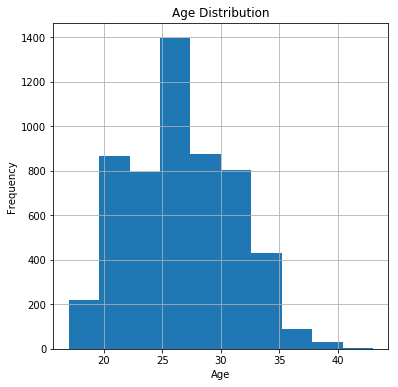

In [45]:
# check if the ages are normally distributed
plt.figure(figsize=(6,6))
df_rate['age'].hist()
plt.title('Age Distribution') 
plt.xlabel('Age') 
plt.ylabel('Frequency')

pd.DataFrame(df_rate['age'].describe())

>The age is normally distributed. 
>
>Since several players have the same age, we will create a group for the players based on their age. Then we will find the average overall rating for all ages.

In [47]:
# group data by age and find the average of overall_rating for each group
ages = df_rate.groupby(age.dt.days)['overall_rating'].mean()

In [48]:
# split ages into 6 groups
age_group = np.array_split(ages, int(len(ages)/4))
age_group

[17    63.800000
 18    61.442308
 19    63.638710
 20    65.608696
 21    67.343972
 Name: overall_rating, dtype: float64, 22    68.195467
 23    70.029024
 24    69.910843
 25    69.962389
 26    71.119914
 Name: overall_rating, dtype: float64, 27    71.504202
 28    71.172888
 29    71.732970
 30    72.013378
 Name: overall_rating, dtype: float64, 31    71.152941
 32    71.411290
 33    69.876404
 34    70.264901
 Name: overall_rating, dtype: float64, 35    71.048544
 36    70.403846
 37    70.891892
 38    71.642857
 Name: overall_rating, dtype: float64, 39    70.727273
 40    69.600000
 41    71.500000
 43    73.000000
 Name: overall_rating, dtype: float64]

> In order to plot a bar chart of ages by overall rating, we will find the average overall rating for each age group. We will ensure that this average is not too high or low so that it is a good representation.

,overall_rating
17-21,64.366737
22-26,69.843528
27-30,71.605859
31-34,70.676384
35-38,70.996785
39-43,71.206818


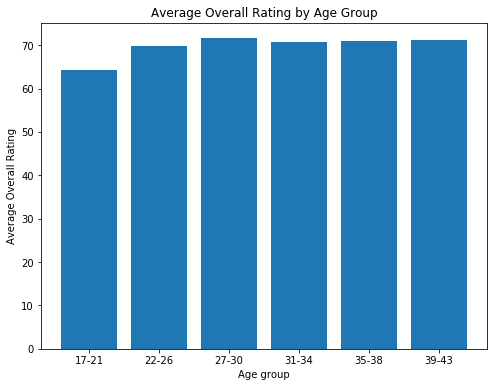

In [49]:
# visualization
plt.figure(figsize=(8,6))

xaxis = ['17-21', '22-26', '27-30', '31-34', '35-38', '39-43']
yaxis = [age_group[0].mean(), age_group[1].mean(), age_group[2].mean(), age_group[3].mean(), age_group[4].mean(),
        age_group[5].mean()]

plt.bar(xaxis, yaxis)
plt.title('Average Overall Rating by Age Group')
plt.xlabel('Age group')
plt.ylabel('Average Overall Rating')

pd.DataFrame(yaxis, columns=['overall_rating'], index= xaxis)

The mean age for the dataset is 27 and it falls into the group with the highest average overall_rating. More players above the mean age tend to have a higher rating.

### 3. Find the mean Overall Rating. Make a comparison of the attributes groups for players with overall rating above the mean (green) and players below the mean (red).

>The aim of this question is to divide the players into the two groups and examine the attributes of players in these groups.
>
>Firstly, we will find the mean then create a group for those players with ratings below and above the mean rating. Working with these two groups, we will find the mean score for attack, skill, movement, power, mentality, defend and goal-keep which are the attributes groups.

In [50]:
# find the mean overall_rating
mean_rating = df_rate['overall_rating'].mean()

In [51]:
# players above the mean
above_players = df_rate.query('overall_rating >= overall_rating.mean()')
above_players.describe()

,age,bmi,overall_rating,potential,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,27.299225,23.076581,75.116279,77.252713,59.521705,60.000620,62.155659,69.279845,67.510000,60.623798,52.667752,15.066667
std,4.026232,1.294597,3.467632,4.286069,19.144942,14.374305,15.452209,10.249312,9.441217,11.615111,23.864239,16.653708
min,17.000000,18.360000,71.000000,71.000000,9.000000,11.400000,13.600000,34.200000,32.200000,17.400000,6.700000,1.000000
25%,24.000000,22.170000,72.000000,74.000000,52.000000,56.200000,56.600000,63.600000,64.200000,57.200000,29.000000,9.800000
50%,27.000000,23.080000,74.000000,77.000000,66.000000,64.000000,66.000000,71.000000,69.400000,63.000000,62.700000,10.800000
75%,30.000000,23.880000,77.000000,80.000000,73.000000,69.000000,72.400000,76.600000,73.600000,67.800000,74.300000,12.000000
max,43.000000,28.060000,90.000000,94.000000,91.000000,83.200000,87.800000,90.600000,89.600000,84.200000,90.000000,88.000000


In [52]:
# players below the mean
below_players = df_rate.query('overall_rating < overall_rating.mean()')
below_players.describe()

,age,bmi,overall_rating,potential,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,25.906261,22.918389,65.484434,69.300718,49.495381,51.691208,53.226822,64.326651,61.035580,52.677592,47.348751,14.854875
std,4.529480,1.355617,3.958894,4.635025,17.366531,12.471724,13.542600,9.711786,9.161743,10.805633,20.451529,14.376595
min,17.000000,18.410000,47.000000,54.000000,6.000000,10.000000,10.600000,26.800000,27.600000,14.200000,6.000000,1.000000
25%,22.000000,22.100000,64.000000,66.000000,37.500000,47.600000,48.000000,58.800000,56.800000,48.600000,27.000000,10.000000
50%,26.000000,22.870000,66.000000,69.000000,55.000000,54.600000,56.000000,66.000000,62.600000,54.600000,55.700000,11.000000
75%,29.000000,23.750000,69.000000,72.000000,63.000000,60.000000,62.800000,71.200000,67.400000,60.000000,65.700000,12.000000
max,41.000000,30.870000,70.000000,86.000000,84.000000,72.400000,77.000000,87.000000,84.000000,73.600000,76.700000,72.000000


,above_mean,below_mean
attack,60.000620,51.691208
skill,62.155659,53.226822
movement,69.279845,64.326651
power,67.510000,61.035580
defend,52.667752,47.348751
goal_keep,15.066667,14.854875


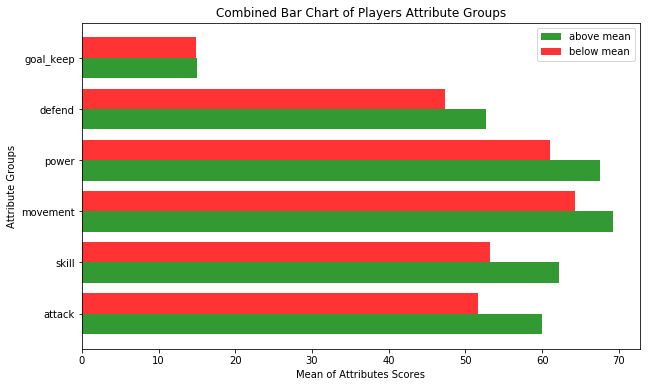

In [54]:
# visualisation
plt.figure(figsize=(10,6))

Xaxis_above = (above_players['attack'].mean(), above_players['skill'].mean(), above_players['movement'].mean(), 
               above_players['power'].mean(), above_players['defend'].mean(), above_players['goal_keep'].mean())

Xaxis_below = (below_players['attack'].mean(), below_players['skill'].mean(), below_players['movement'].mean(), 
               below_players['power'].mean(), below_players['defend'].mean(), below_players['goal_keep'].mean())

ylabel = ['attack', 'skill', 'movement', 'power', 'defend', 'goal_keep']
yaxis = np.arange(len(ylabel))

plt.barh(yaxis - 0.2, Xaxis_above, 0.4, color='g', alpha=0.8, label='above mean')
plt.barh(yaxis + 0.2, Xaxis_below, 0.4, color='r', alpha=0.8, label='below mean')

plt.yticks(yaxis, ylabel)
plt.title('Combined Bar Chart of Players Attribute Groups')
plt.xlabel('Mean of Attributes Scores')
plt.ylabel('Attribute Groups')

plt.legend()

plot_data = {'above_mean' : Xaxis_above, 'below_mean':Xaxis_below }
pd.DataFrame(plot_data, index=[ylabel])

>Players above the mean have a higher score for all the attributes. Skill and Attack attributes group have a wider difference for the two groups of players compared to movement, power and defend. Goal_keep attributes group appears to have equal scores for players with overall rating above and below the mean.

### 4. Is there a relationship between BMI and Overall Rating?

>As earlier defined, Body Mass Index (BMI) is a metric that indicates if a person has the right weight for their height. Having a healthy weight reduces joint and muscle pains and increases the energy and ability to be physically active. We will examine how this metric affects the overall rating for the players. 
>
>Weight types are grouped under the following BMI range:  
**Underweight: Below 18.5	
Healthy: 18.5–24.9	
Overweight: 25.0–29.9	
Obese: 30.0 and above**	
>
> We will divide the data into four dataframes for each weight category. To do this we will have to create two functions. The first function does the actual categorisation but it returns a list so the second function will be used to covert the list back to a dataframe
>To better understand the distribution of the BMI values, we will use a scatterplot. 

>Firstly, we create a function for the weight category.

In [56]:
# these are the weight categories
df_under = df_rate[df_rate['bmi'] < 18.5]  #underweight
df_healthy = df_rate[(df_rate['bmi'] > 18.5) & (df_rate['bmi'] < 25.0)]  #healthy players
df_over = df_rate[(df_rate['bmi'] > 25.0) & (df_rate['bmi'] < 30.0)]  #overweight players
df_obese = df_rate[df_rate['bmi'] > 30.0] #obese players


def bmi():
    
    ''' This function splits the dataframe into four
        groups depending on the values in the BMI column.
        It takes no parameter and returns four items.
    '''
    
    global df_rate
    global df_under
    global df_healthy
    global df_over
    global df_obese
    
    if (df_rate['bmi'] < 18.5).any():
        df_under
        
    elif ( 18.5 < df_rate['bmi'] <= 25.0).any():
        df_healthy
        
    elif (25.0 < df_rate['bmi'] <= 30.0).any():
        df_over  
        
    else: 
        df_obese
       
        
    return df_under, df_healthy, df_over, df_obese

underweight, healthy, overweight, obese = bmi()  #calling the function

>The function for the weight categories have now been created but the values of underweight, healthy, overweight, obese are in a list format making them hard to understand. The following block of code will convert these lists to a dataframe.

In [57]:
def create_df(data):
    
    ''' This function converts a list into a dataframe.
        It takes in one parameter which is the list to 
        be converted and returns it in a dataframe form.
    '''
    
    new_df = pd.DataFrame(data)
    
    return new_df  

>Now, we can see the dataframes of underweight, healthy, overweight and obese players.

In [58]:
create_df(underweight)

,player_name,age,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
59,Adam Gyurcso,25,18.41,2016-04-14,69.0,73.0,right,59.0,65.6,63.4,73.0,61.2,60.0,17.7,9.2
2009,Harry Kane,22,18.36,2016-04-28,82.0,88.0,right,78.0,76.0,72.6,73.2,78.6,69.4,38.3,10.8
4867,Simon Lappin,33,18.41,2016-04-21,63.0,63.0,left,62.0,58.6,64.8,66.4,61.0,62.2,59.7,12.2


In [63]:
(create_df(healthy)).head() 

,player_name,age,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
1,Aaron Cresswell,26,22.87,2016-04-21,74.0,76.0,left,62.0,60.4,70.2,78.4,70.6,64.0,76.3,10.2
4,Aaron Hunt,29,21.84,2016-04-28,77.0,77.0,left,76.0,73.8,76.0,74.4,71.4,69.6,32.3,13.0
5,Aaron Kuhl,20,22.20,2016-04-21,61.0,74.0,right,38.0,45.0,55.4,67.4,57.8,54.2,55.7,12.8
6,Aaron Lennox,23,22.62,2016-02-25,48.0,56.0,right,12.0,16.0,17.4,28.2,27.6,22.0,14.0,47.4
7,Aaron Mooy,25,22.15,2016-02-04,75.0,78.0,right,72.0,66.6,75.2,68.8,72.2,73.0,61.0,10.8


In [62]:
(create_df(overweight)).head()

,player_name,age,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
0,Aaron Appindangoye,23,25.36,2016-02-18,67.0,71.0,right,35.0,53.8,49.6,59.0,55.6,57.6,67.7,8.6
2,Aaron Doran,24,25.53,2016-01-07,65.0,67.0,right,57.0,60.0,65.0,75.8,64.0,61.6,23.0,12.2
3,Aaron Galindo,33,26.85,2016-04-21,69.0,69.0,right,29.0,51.8,51.4,45.4,59.6,49.8,70.3,12.6
33,Abdul Aziz Tetteh,27,25.77,2016-05-05,67.0,68.0,right,66.0,49.2,58.8,60.0,72.6,60.8,66.0,12.0
44,Abraham Gonzalez,30,25.25,2016-04-28,73.0,73.0,right,73.0,61.0,73.6,55.4,62.0,68.2,68.0,9.0


In [61]:
create_df(obese)

,player_name,age,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
5021,Sylvan Ebanks-Blake,30,30.87,2016-04-28,62.0,62.0,right,54.0,55.6,51.8,57.0,58.6,52.2,19.7,10.4


> From the queries above: 
> - the least underweight player has a rating of (82.0) which is higher than the average overall rating of the dataset (70.00)  while the other underweight players each have an overall rating below the average,
> - the healthy players with a mean BMI of 22.8 have an average overall rating of 69.99 which is approximately equal to the  average overall rating of the dataset (70.00),
> - the overweight players with a mean BMI of 25.72 (close to the range of BMI for healthy players) have an average overall rating of 70.55 which is close to the average overall rating of the dataset (70.00),
> - and the only player who is obese has an overall rating of 62.0 which is lower than the average overall rating of the dataset.
>
> To better understand the distribution, let us make the scatterplot.

,bmi,overall_rating
count,5503.000000,5503.000000
mean,22.992555,70.000182
std,1.329584,6.088273
min,18.360000,47.000000
25%,22.110000,66.000000
50%,23.010000,70.000000
75%,23.860000,74.000000
max,30.870000,90.000000


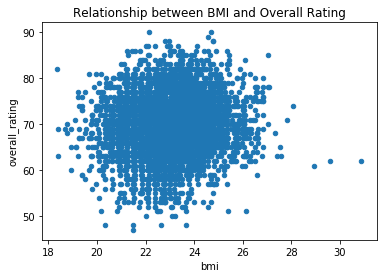

In [64]:
#visualisation
df_rate.plot(x='bmi', y='overall_rating', kind='scatter')
plt.title('Relationship between BMI and Overall Rating')

df_rate[['bmi','overall_rating']].describe()

> The scatter plot shows that the obese player is an outlier and the player with the highest rating has an helathy BMI.The peak points are between the BMI of 22 and 24. We can see the concentration of points between the BMI of 21 and 25 and overall rating of 60 and 82. This suggests that players with good ratings have healthy weights.

### 5. Compare the trend for players general overall rating and potential in 2016. 

>The aim of this question is to examine the general rate of improvement of potential and overall ratings. Although the two variables are independent of each other, we will check their relationship using a scatter plot. How often do players meet up to their potential?
>
>Firstly, we will extract the months from the date. Then we will find the average overall and potential rating for each month. We have to group the months because several ratings were collected in each month. Using a line chart and a scatterplot, we will analyse the potential and overall ratings over time.

In [66]:
# extract month from date column
month = df_rate['date'].dt.month

,months,potential,overall_rating
date,,,
1,Jan,72.856075,70.128972
2,Feb,72.972678,70.067395
3,Mar,72.395091,69.372922
4,Apr,72.993590,69.846737
5,May,74.024762,71.033333
6,Jun,72.824607,69.685864
7,Jul,75.125000,68.125000


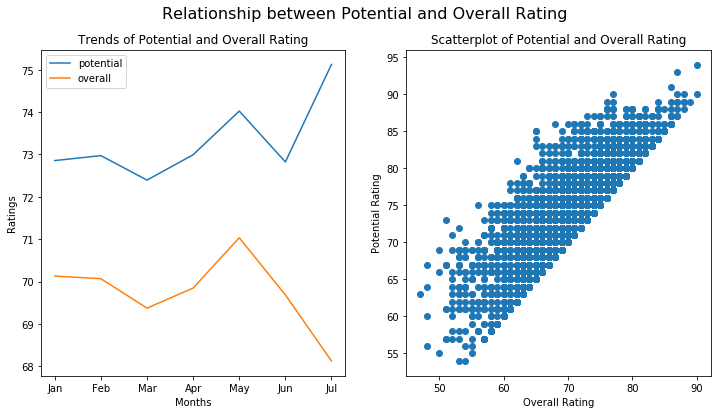

In [68]:
# visualization for the relationship between our dependent variables
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
x_label= ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'] #the plot skipped the first entry of this array

# first plot
ax1.plot(df_rate.groupby(month)['potential'].mean(), label='potential')
ax1.plot(df_rate.groupby(month)['overall_rating'].mean(), label='overall')
ax1.set_xticklabels(x_label)
ax1.set_xlabel('Months')
ax1.set_ylabel('Ratings')
ax1.set_title('Trends of Potential and Overall Rating')
ax1.legend()

# second plot
ax2.scatter(x= df_rate['overall_rating'], y= df_rate['potential'])
ax2.set_xlabel('Overall Rating')
ax2.set_ylabel('Potential Rating')
ax2.set_title('Scatterplot of Potential and Overall Rating')

fig.suptitle('Relationship between Potential and Overall Rating', fontsize=16)

plot_data = {'months':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'], 
             'potential': df_rate.groupby(month)['potential'].mean(),
             'overall_rating': df_rate.groupby(month)['overall_rating'].mean()}

pd.DataFrame(plot_data)

> There is a clear difference between the overall and potential ratings. However, there seems to be a relationship in the rise and fall of the lines except in June and July when it was projected that ratings would improve but they further declined. 
>
>Generally, the potential and overall rating have a positive correlation. As the overall rating increases, so does the potential rating. Also, there are no apparent outliers.

In [69]:
# understand the attributes of players who meet or are above their potential.
df_rate.query('overall_rating >= potential').describe()

,age,bmi,overall_rating,potential,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
count,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000
mean,30.581240,23.227379,71.182580,71.182580,55.055695,56.282998,57.629648,64.631491,64.988358,57.909966,51.436767,16.180486
std,2.689585,1.302721,5.421736,5.421736,19.663354,15.315545,16.185183,10.729809,10.086030,12.652916,22.820348,17.672548
min,25.000000,18.410000,54.000000,54.000000,6.000000,11.400000,12.400000,34.000000,29.200000,14.600000,6.700000,1.000000
25%,28.000000,22.380000,67.000000,67.000000,43.000000,51.400000,51.200000,57.400000,61.200000,54.600000,29.000000,9.800000
50%,30.000000,23.220000,71.000000,71.000000,61.000000,60.000000,61.200000,66.300000,67.200000,60.400000,61.000000,11.000000
75%,32.000000,24.070000,75.000000,75.000000,69.000000,66.200000,68.600000,72.400000,71.650000,65.800000,71.000000,12.200000
max,43.000000,30.870000,90.000000,90.000000,90.000000,82.000000,87.800000,90.600000,87.400000,84.200000,90.000000,88.000000


### 6. Who are the top 10 players for the year 2016?

> As a final question, the aim of this question is to understand the attributes of the top players and see how it relates to the insights that we have gathered from above. We will sort the data in descending order based on the overall rating column and pick the first 10 rows.

In [70]:
# sort the dataset in descending order based on the overall_rating column
top_players = df_rate.nlargest(10, ['overall_rating'])
top_players

,player_name,age,bmi,date,overall_rating,potential,preferred_foot,long_shots,attack,skill,movement,power,mentality,defend,goal_keep
3235,Manuel Neuer,30,24.71,2016-04-21,90.0,90.0,right,16.0,22.4,23.8,56.8,49.2,35.6,10.3,88.0
3923,Neymar,24,22.15,2016-02-04,90.0,94.0,right,73.0,76.6,83.6,88.6,67.2,68.2,26.0,11.8
498,Arjen Robben,32,24.55,2016-01-28,89.0,89.0,left,90.0,77.4,85.0,90.6,75.0,67.6,27.0,9.8
1397,Eden Hazard,25,24.78,2016-01-28,88.0,90.0,right,82.0,76.4,85.4,89.6,71.4,70.2,24.7,9.0
3643,Mesut Oezil,27,22.78,2016-02-18,88.0,89.0,left,76.0,75.0,84.6,77.2,63.6,66.2,19.0,10.0
4494,Robert Lewandowski,27,22.96,2016-01-28,88.0,89.0,right,82.0,80.0,76.4,80.8,82.2,72.4,28.7,10.2
4807,Sergio Aguero,27,24.78,2016-03-10,88.0,88.0,right,84.0,78.4,79.0,88.4,79.6,67.6,15.0,11.8
1163,David De Gea,25,22.03,2016-04-21,87.0,90.0,right,12.0,19.0,23.2,58.0,39.8,37.6,15.7,85.8
1789,Gareth Bale,26,22.11,2016-04-28,87.0,89.0,left,88.0,80.2,84.8,82.4,82.2,74.4,62.3,10.4
2238,James Rodriguez,24,23.01,2016-02-18,87.0,93.0,left,87.0,83.2,84.0,79.6,74.4,76.6,34.0,12.8


>60% of the top players prefer to play with their right foot
>
>A higher number of the top players fall within the age group known for high overall rating
>
>All top players have a BMI that indicates an healthy weight
>
> 30% of them met or exceeded thier potential
>
>There is no clear relationship between long shots and preffered foot. Long shots score is generally lower for goal keepers.
>
>Top players tend to have a low defend score

<a id='conclusions'></a>
## Conclusions

> The above analysis was carried out to understand how certain attributes affect the overall rating of players. 
> Firstly, we saw that preferred foot had no effect on the rating although left-foot players tend to have a higher score for long shots.
>
> Secondly, players within the age range of 27-30 had a higher overall rating. Older players also tend to have a higher rating.
>
> Thirdly, players with higher ratings tend to have a healthy weight. 
>
> Attack, Skill, Mentality and Defend attribute groups score appeared to have more effect on the overall rating score.
>
>Finally, there were more players with an overall score below the mean overall rating than there were above. A larger percentage of the potential rating seemed to be overrated for the players.


> **Limitation**: 
- The dataset is relatively an outdated one. For this reason, I analysed only the latest year. There were a lot of missing values for the players' attributes in this year which limited the number of data I had to work with. 
- Multiple aggregations can conceal certain insights. The attributes were aggregated into groups. 
- No statistical tests have been carried out to confirm my suggestions.
- No correlations were checked among variables.

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0